<img src="MC.jpg" align="right"  alt="Drawing" style="width: 200px;"/>

# <span style="color:#00A86B">Statistics & Econometrics practical task</span>
#### <span style="color:#cdd873">$by$ $Anastasiia$ $Khaburska$</span>



 ___________________________________________________________________






###  <span style="color:#901a1a">Problem 6: Regression techniques</span>

In [1]:
library(ggplot2)
library(gridExtra)
library(grid)

$tenure$ - month a client 

$age$ - age in years

$marital \ status$ - (1 - married, 0 - single)

$address$ - years at the current address

$income$ - household income in TEuro

$ed$ - education (5 categories: 
        Did not complete high school; 
        High school degree;
        Some college; 
        College degree;
        Post-undergraduate degree)

$retire$ - retired (0 - no, 1 - yes)

$gender$ - (0 - male, 1 - female)

$longmon$ - long distance calls last month

$wiremon$ - internet use last month

$churn$ - 1 if the contract was terminated last month and 0 else

In [2]:
df <- read.table("telco.txt")
print("number of users", str(nrow(df)))
print("number of variables", str(ncol(df)))

 int 1000
[1] "number of users"
 int 12
[1] "number of variables"


In [3]:
#df<-c(df['age'], df['tenure'])
df2<-data.frame(df$tenure,df$age,df$marital, df$address, df$income, df$ed, df$employ, df$retire, df$gender, df$wiremon, df$churn, df$longmon)
df2[c(1:5,995:1000),1:12]

,df.tenure,df.age,df.marital,df.address,df.income,df.ed,df.employ,df.retire,df.gender,df.wiremon,df.churn,df.longmon
1,13,44,Married,9,64,College degree,5,No,Male,0.0,Yes,3.70
2,11,33,Married,7,136,Post-undergraduate degree,5,No,Male,35.7,Yes,4.40
3,68,52,Married,24,116,Did not complete high school,29,No,Female,0.0,No,18.15
4,33,33,Unmarried,12,33,High school degree,0,No,Female,0.0,Yes,9.45
5,23,30,Married,9,30,Did not complete high school,2,No,Male,0.0,No,6.30
995,15,46,Married,17,63,Post-undergraduate degree,1,No,Male,33.1,Yes,3.70
996,10,39,Unmarried,0,27,Some college,0,No,Female,0.0,No,3.00
997,7,34,Unmarried,2,22,Post-undergraduate degree,5,No,Female,0.0,No,4.65
998,67,59,Unmarried,40,944,Post-undergraduate degree,33,No,Female,65.8,No,26.75
999,70,49,Unmarried,18,87,High school degree,22,No,Female,0.0,No,25.60


#####  <span style="color:#901a1a">The lasso regression is an alternative approach to variable selection.</span>

##### <span style="color:#d03b3b">(a) Explain in your own words the idea of the lasso regression. Sketch a situation when a simple linear regression fails, but the lasso regression still can be estimated.</span>

In general LR we usually firstly estimate the model and only AFTER do some model selection.

The IDEA of the LASSO regression is to perform the model selection SIMULTANIOUSLY with the estimation of the parametrs.The objective function of the OLS procedure is replaced with:
 <span style="color:#00A86B">$$\sum_{k=1}^{K}{(y_k-B_0-\sum_{j=1}^{J}{B_jx_{kj}}})^2+\lambda\sum_{j=1}^{J}{|B_j|} -> min$$</span>

The larger is $\lambda$ the more strict penalization, more parametrs assert to $0$. Which is equivalent to the particular feature being excluded from the model.

If $\lambda=0 => $ LASSO Regression becomes the same as OLS.

For example, LASSO can be applied to really big data sets. It's helpful when we have many features (K is big) but not so many observations (J is relatively small). Thus in OLR many parameters whould be unsignifficant and we would have unreliable model selection. But getting a sparse solution is of great computational advantage as the features with zero coefficients can simply be ignored.

It arbitrarily selects any one feature among the highly correlated ones and reduced the coefficients of the rest to zero

##### <span style="color:#d03b3b">(b) For the usual regression model the variables are rarely normalized/standardized. However, in the case of the lasso regression the scaling becomes crucial. Why? Scale your data by $((x_i − x̄)/σ̂ x )$. Can/should the binary variables be scaled in the same fashion? How would you handle the variable $ed$?</span>

Normalization is very important for methods with regularization, in particular LASSO regression. This is BECAUSE the scale of the variables affect the how much regularization will be applies to specific variable. So, Lasso regression would be fair to all regressands if they are standardized.

For EXAMPLE, suppose one variable is in a very large scale, say order of millions and another variable is from 0 to 1. Then, the regularization will have little effect on first variable.

As well as we do normalization, normalize it to 0 to 1 or standardize the features does not matter too much.

One of the most used softwares for lasso is $R's$ $glmnet$. From the help page, printed by $glmnet$

    standardize: Logical flag for x variable standardization, prior to fitting the model sequence. The coefficients are always returned on the original scale. Default is ‘standardize=TRUE’...

standardize is one of the arguments, defaults to true. So the X
variables are usually standardized, and this includes DUMMYS AND BINARY VARIABLES(since there is no mention of an exception for them). But the coefficients are reported on the original scale. 

Thus, I would handle variable $ed$ the same as I have done it in Problem 4: use four binary variables, one for each level of education. 

In [4]:
readed_df <- read.table("telco.txt")

df <- read.table("telco.txt")

df$marital <- gsub("Married", 1, df$marital)
df$marital <- gsub("Unmarried", 0, df$marital)
df$marital_Yes <- as.numeric(df$marital)
df$marital <-NULL

df$retire <- gsub("Yes", 1, df$retire)
df$retire <- gsub("No", 0, df$retire)
df$retire_Yes <- as.numeric(df$retire)
df$retire <-NULL

df$gender <- gsub("Female", 1, df$gender)
df$gender <- gsub("Male", 0, df$gender)
df$gender_Female <- as.numeric(df$gender)
df$gender <-NULL

df$churn <- gsub("Yes", 1, df$churn)
df$churn <- gsub("No", 0, df$churn)
df$churn_Yes <- as.numeric(df$churn)
df$churn <-NULL

df$ed <- gsub("Post-undergraduate degree", 0, df$ed)
df$ed <- gsub("College degree", 0, df$ed)
df$ed <- gsub("Some college", 0, df$ed)
df$ed <- gsub("High school degree", 1, df$ed)
df$ed <- gsub("Did not complete high school", 0, df$ed)
df$ed_HS <- as.numeric(df$ed)

df$ed <- readed_df$ed

df$ed <- gsub("Post-undergraduate degree", 0, df$ed)
df$ed <- gsub("College degree", 0, df$ed)
df$ed <- gsub("Some college", 1, df$ed)
df$ed <- gsub("High school degree", 0, df$ed)
df$ed <- gsub("Did not complete high school", 0, df$ed)
df$ed_SC <- as.numeric(df$ed)

df$ed <- readed_df$ed

df$ed <- gsub("Post-undergraduate degree", 0, df$ed)
df$ed <- gsub("College degree", 1, df$ed)
df$ed <- gsub("Some college", 0, df$ed)
df$ed <- gsub("High school degree", 0, df$ed)
df$ed <- gsub("Did not complete high school", 0, df$ed)
df$ed_CD <- as.numeric(df$ed)

df$ed <- readed_df$ed

df$ed <- gsub("Post-undergraduate degree", 1, df$ed)
df$ed <- gsub("College degree", 0, df$ed)
df$ed <- gsub("Some college", 0, df$ed)
df$ed <- gsub("High school degree", 0, df$ed)
df$ed <- gsub("Did not complete high school", 0, df$ed)
df$ed_PD <- as.numeric(df$ed)

df$ed <- readed_df$ed

df$ed <- NULL

So, numerated dataframe with dummies

In [5]:
df

tenure,age,address,income,employ,longmon,wiremon,marital_Yes,retire_Yes,gender_Female,churn_Yes,ed_HS,ed_SC,ed_CD,ed_PD
13,44,9,64,5,3.70,0.00,1,0,0,1,0,0,1,0
11,33,7,136,5,4.40,35.70,1,0,0,1,0,0,0,1
68,52,24,116,29,18.15,0.00,1,0,1,0,0,0,0,0
33,33,12,33,0,9.45,0.00,0,0,1,1,1,0,0,0
23,30,9,30,2,6.30,0.00,1,0,0,0,0,0,0,0
41,39,17,78,16,11.80,0.00,0,0,1,0,1,0,0,0
45,22,2,19,4,10.90,0.00,1,0,1,1,1,0,0,0
38,35,5,76,10,6.05,64.90,0,0,0,0,1,0,0,0
45,59,7,166,31,9.75,0.00,1,0,0,0,0,0,1,0
68,41,21,72,22,24.15,0.00,1,0,0,0,0,0,0,0


Now, lets scale the data using $\frac{(x_i − x̄)}{σ̂ x}$.

In [6]:
#1)dummies normalized
scaled.df <- as.data.frame(scale(df))
#scaled.df <- (df- mean(df)) / sd(df)
#2)dummies not normalized
#scaled.df$tenure <- (df$tenure - mean(df$tenure)) / sd(df$tenure)
#scaled.df$age <- (df$age - mean(df$age)) / sd(df$age)
#scaled.df$address <- (df$address - mean(df$address)) / sd(df$address)
#scaled.df$income <- (df$income - mean(df$income)) / sd(df$income)
#scaled.df$employ <- (df$employ - mean(df$employ)) / sd(df$employ)
#scaled.df$longmon<- (df$longmon - mean(df$longmon)) / sd(df$longmon)
#scaled.df$wiremon<- (df$wiremon - mean(df$wiremon)) / sd(df$wiremon)

Finaly SCALED data :

In [7]:
scaled.df

tenure,age,address,income,employ,longmon,wiremon,marital_Yes,retire_Yes,gender_Female,churn_Yes,ed_HS,ed_SC,ed_CD,ed_PD
-1.05459730,0.18441228,-0.25290776,-0.126443137,-0.5938255,-0.774169982,-0.5874360,1.0095454,-0.2219654,-1.0340807,1.6269559,-0.6341309,-0.5137687,1.8083779,-0.2656937
-1.14823108,-0.69146644,-0.45118903,0.546176432,-0.5938255,-0.706625144,1.2229616,1.0095454,-0.2219654,-1.0340807,1.6269559,-0.6341309,-0.5137687,-0.5524288,3.7599686
1.52033174,0.82141499,1.23420178,0.359337663,1.7866340,0.620148453,-0.5874360,1.0095454,-0.2219654,0.9660754,-0.6140302,-0.6341309,-0.5137687,-0.5524288,-0.2656937
-0.11825947,-0.69146644,0.04451415,-0.416043229,-1.0897545,-0.219337387,-0.5874360,-0.9895544,-0.2219654,0.9660754,1.6269559,1.5753845,-0.5137687,-0.5524288,-0.2656937
-0.58642838,-0.93034245,-0.25290776,-0.444069044,-0.8913829,-0.523289156,-0.5874360,1.0095454,-0.2219654,-1.0340807,-0.6140302,-0.6341309,-0.5137687,-0.5524288,-0.2656937
0.25627566,-0.21371441,0.54021732,0.004344001,0.4972185,0.007420283,-0.5874360,-0.9895544,-0.2219654,0.9660754,-0.6140302,1.5753845,-0.5137687,-0.5524288,-0.2656937
0.44354323,-1.56734516,-0.94689221,-0.546830367,-0.6930113,-0.079423080,-0.5874360,1.0095454,-0.2219654,0.9660754,1.6269559,1.5753845,-0.5137687,-0.5524288,-0.2656937
0.11582499,-0.53221576,-0.64947031,-0.014339876,-0.0978964,-0.547412313,2.7037349,-0.9895544,-0.2219654,-1.0340807,-0.6140302,1.5753845,-0.5137687,-0.5524288,-0.2656937
0.44354323,1.37879236,-0.45118903,0.826434585,1.9850057,-0.190389599,-0.5874360,1.0095454,-0.2219654,-1.0340807,-0.6140302,-0.6341309,-0.5137687,1.8083779,-0.2656937
1.52033174,-0.05446373,0.93677987,-0.051707629,1.0923334,1.199104205,-0.5874360,1.0095454,-0.2219654,-1.0340807,-0.6140302,-0.6341309,-0.5137687,-0.5524288,-0.2656937


##### <span style="color:#d03b3b"> (c) Run a lasso regression for data with $\lambda$ ∈ (0, 1). Plot the estimated parameters as functions of  $\lambda$ . Which value of  $\lambda$  would you recommend? If easy to implement determine the optimal λ by cross-validation.</span>

First plot will be with feature matrix scaled, and $longmon$ as well.

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16

Loading required package: plotrix
Loading required package: TeachingDemos


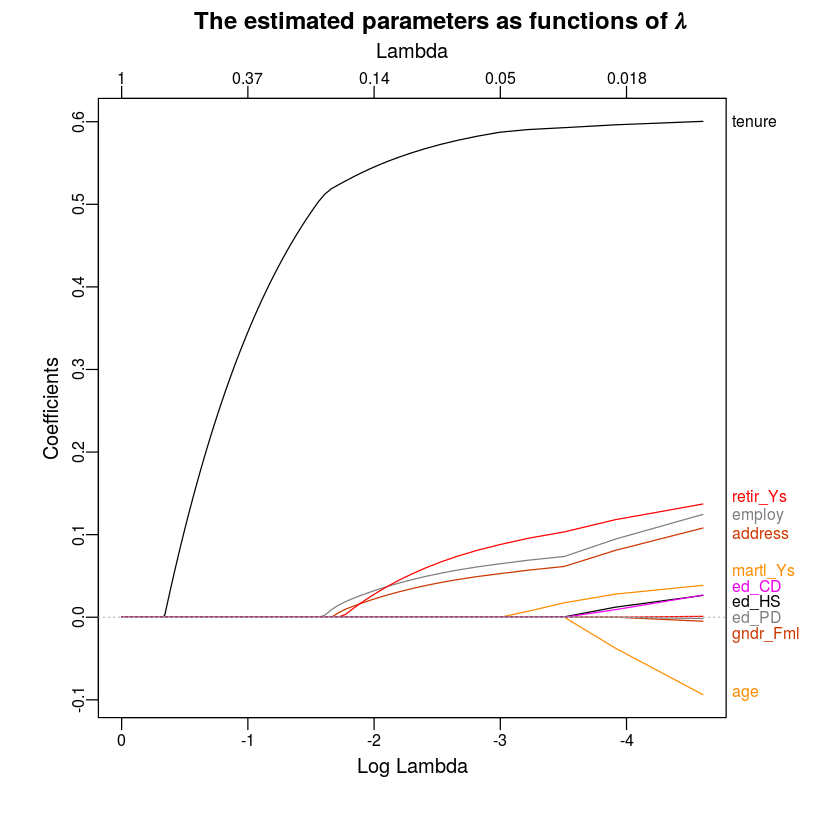

In [8]:
library(glmnet)
library(plotmo) # for plot_glmnet

lambdas <- seq(from = 0.01,to = 1, by = 0.01)
myscaled<-scaled.df
myscaled$longmon<-NULL
lasso <- glmnet(as.matrix(myscaled), as.matrix(scaled.df$longmon), alpha=1, lambda=lambdas, standardize=FALSE)
plot_glmnet(lasso)
title("The estimated parameters as functions of 𝜆 \n\n")

From the picture we can see that, as 𝜆
becomes greater than 0.2, almost all the parameters exept from 𝑡𝑒𝑛𝑢𝑟𝑒 become equal to 0. It's too strong penalization

Second plot will be with feature matrix standartized, but 𝑙𝑜𝑛𝑔𝑚𝑜𝑛 is left in original scale, as it is by default in glmnet package. Paramters here are the same (proportionally), but the plot is more detailed and it's eathier to catch the best lambda and analyze the importance of features

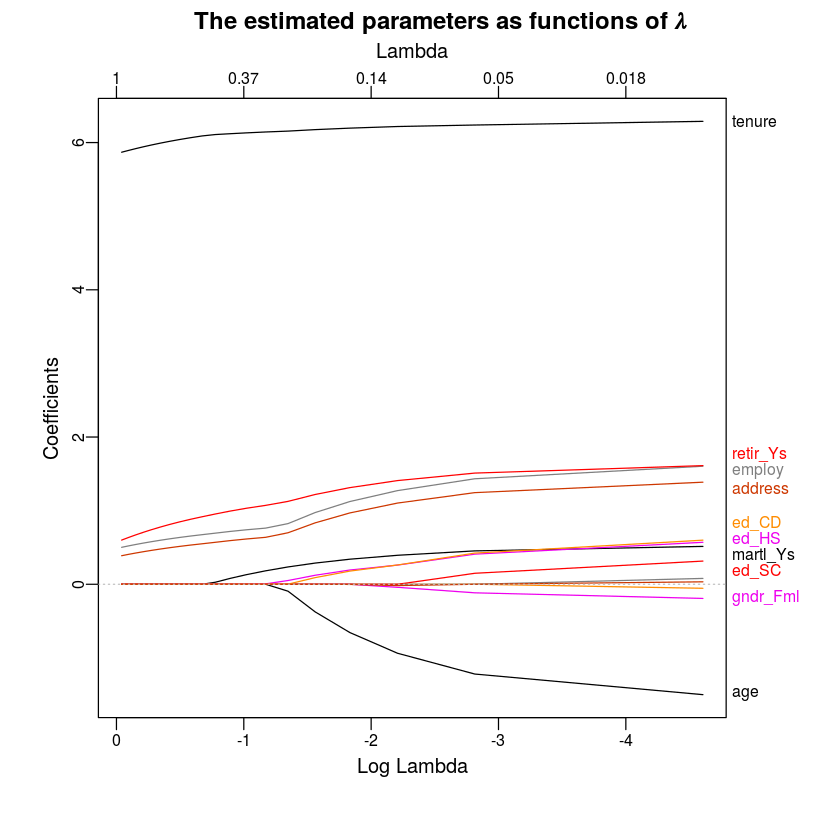

In [9]:
lambdas <- seq(from = 0.01,to = 1, by = 0.05)
myscaled<-scaled.df
myscaled$longmon<-NULL
lasso <- glmnet(as.matrix(myscaled), as.matrix(df$longmon), alpha=1, lambda=lambdas)
plot_glmnet(lasso )
title("The estimated parameters as functions of 𝜆 \n\n")

   So in next step I will use not scaled longmon.

[1] "The value of lambda that gives minimum cvm."

[1] 0.04431682

[1] "The largest value of lambda such that error is within 1 standard error of the minimum."

[1] 1.520275

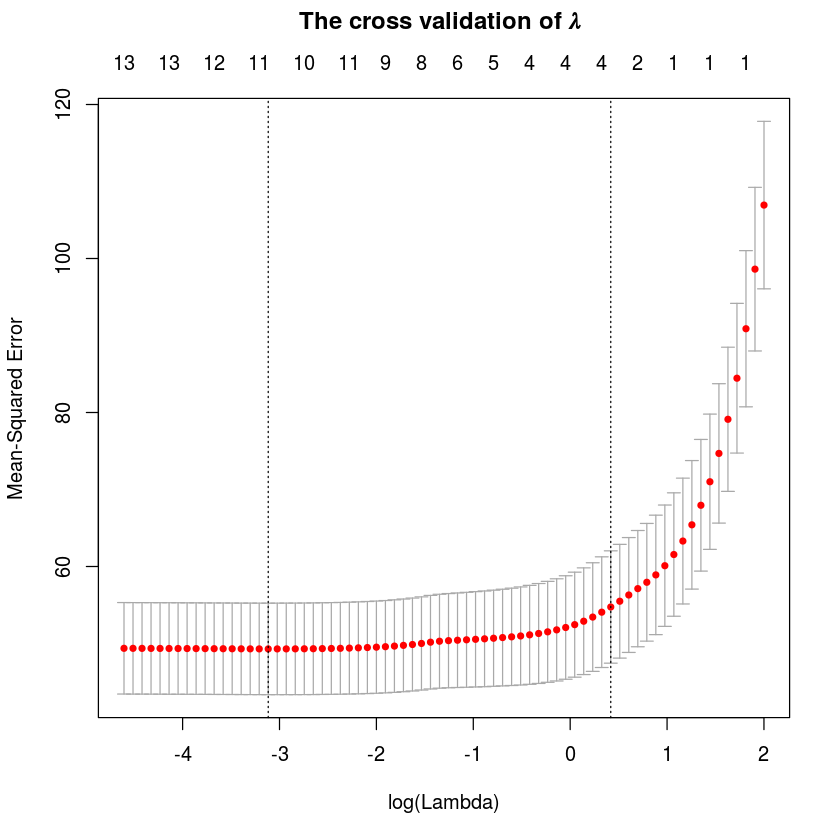

In [10]:
cv.lasso = cv.glmnet(as.matrix(myscaled), as.matrix(df$longmon), alpha=1);
plot(cv.lasso)
title("The cross validation of 𝜆 \n\n")
"The value of lambda that gives minimum cvm."
cv.lasso$lambda.min
"The largest value of lambda such that error is within 1 standard error of the minimum."
cv.lasso$lambda.1se


I suggest to take not the value of lambda that gives minimum cvm but the value of lambda which is the largest value such that error is within 1 standard error of the minimum. This is a good idea to shift lambda to the right from minimum cvm to avoid overfiting the model, in some sense, and not to take to many parameters to the model.

#####  <span style="color:#901a1a"> 2. A nonlinear regression offers a flexible technique for modelling complex relationships. We wish to explain the $longmon$ by the years under the current address of the clients.</span>
##### <span style="color:#d03b3b">(a) Make a bivariate scatter plot and estimate an appropriate linear (!) model. Add the regression curve to the plot.</span>

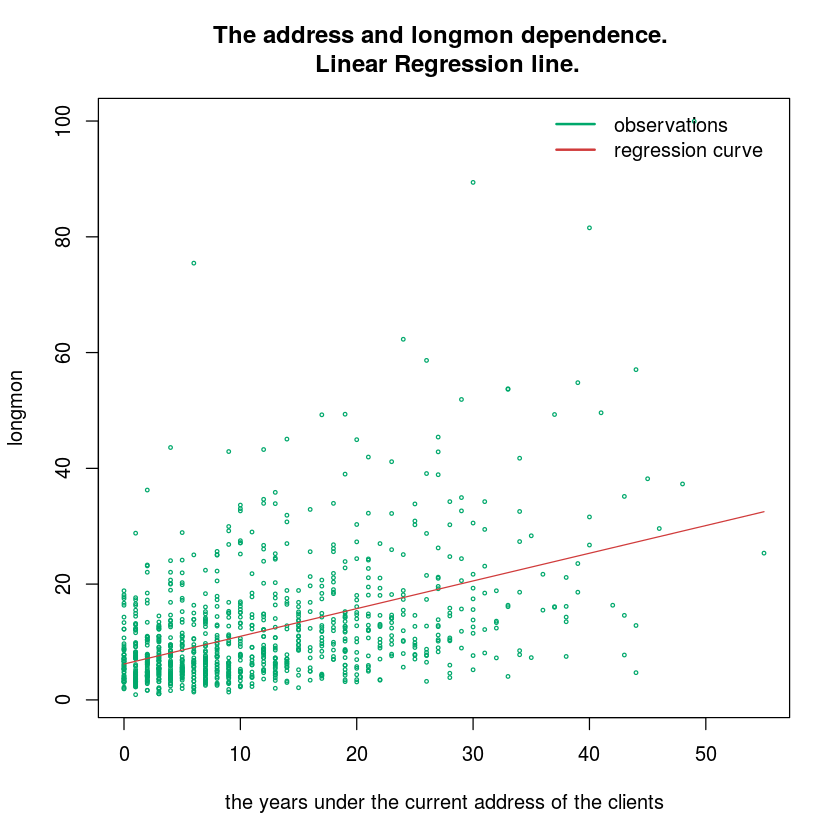

In [11]:
plot(x=df$address, y = df$longmon , col = "#00A86B" , 
     cex=.4 ,xlab="the years under the current address of the clients", ylab="longmon" )
lines(df$address, fitted(lm(longmon~address, data=df)), col="#d03b3b") # regression line (y~x)
#lines(df$address[order(df$address)], predict(lm(longmon~poly(address,2), data=df[order(df$address),])), col="#cdd873") # regression line (y~x)
#lines(df$address[order(df$address)], predict(lm(longmon~address+I(address^2)+I(address^3), data=df[order(df$address),])), col="#901a1a") # regression line (y~x) 
title("\nThe address and longmon dependence. \n Linear Regression line.\n")

legend(x = "topright", 
 c("observations", "regression curve "),
 col = c("#00A86B", "#d03b3b"),
 lwd = c(2, 2, 2),bty='n', xpd=NA)

##### <span style="color:#d03b3b">(b) Estimate now an appropriate nonlinear regression which might fit the data better. Add the regression curve to the plot and compare (quantitatively) the fit with the fit of the linear model.</span>

In [12]:
z1 <- lm(longmon~address, data=df)
z0 <- lm(longmon~poly(address,2), data=df)
z2 <- nls(longmon~a+b*address^c, data=df, start=list(a=0, b=1, c=2))
z3 <- nls(longmon ~ a1*exp(b1*address), data=df, start=list(a1=100,b1=.05))

In [13]:
'LINEAR REGRESSION'
summary(z1)

[1] "LINEAR REGRESSION"


Call:
lm(formula = longmon ~ address, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-22.547  -5.058  -2.240   2.775  70.311 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.19697    0.44128   14.04   <2e-16 ***
address      0.47841    0.02878   16.62   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.176 on 998 degrees of freedom
Multiple R-squared:  0.2168,	Adjusted R-squared:  0.216 
F-statistic: 276.3 on 1 and 998 DF,  p-value: < 2.2e-16


In [14]:
"POLINOMIAL REGRESSION"
summary(z0)

[1] "POLINOMIAL REGRESSION"


Call:
lm(formula = longmon ~ poly(address, 2), data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-26.941  -4.883  -2.219   2.562  68.603 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        11.7231     0.2887  40.606  < 2e-16 ***
poly(address, 2)1 152.5219     9.1295  16.706  < 2e-16 ***
poly(address, 2)2  30.5541     9.1295   3.347 0.000848 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.13 on 997 degrees of freedom
Multiple R-squared:  0.2255,	Adjusted R-squared:  0.224 
F-statistic: 145.2 on 2 and 997 DF,  p-value: < 2.2e-16


In [15]:
"NON-LINEAR REGRESSION.POLINOMIAL MODEL"
summary(z2)

[1] "NON-LINEAR REGRESSION.POLINOMIAL MODEL"


Formula: longmon ~ a + b * address^c

Parameters:
  Estimate Std. Error t value Pr(>|t|)    
a  7.70639    0.52736  14.613   <2e-16 ***
b  0.07910    0.04684   1.689   0.0916 .  
c  1.50556    0.16415   9.172   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.134 on 997 degrees of freedom

Number of iterations to convergence: 8 
Achieved convergence tolerance: 2.754e-06


In [16]:
"NON-LINEAR REGRESSION. EXPONENTIAL MODEL"
summary(z3)

[1] "NON-LINEAR REGRESSION. EXPONENTIAL MODEL"


Formula: longmon ~ a1 * exp(b1 * address)

Parameters:
   Estimate Std. Error t value Pr(>|t|)    
a1 7.474095   0.315355   23.70   <2e-16 ***
b1 0.033486   0.001686   19.86   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.123 on 998 degrees of freedom

Number of iterations to convergence: 5 
Achieved convergence tolerance: 4.884e-07


It can be observed from those four models that non linear, exponential fits the best. The smallest RSE

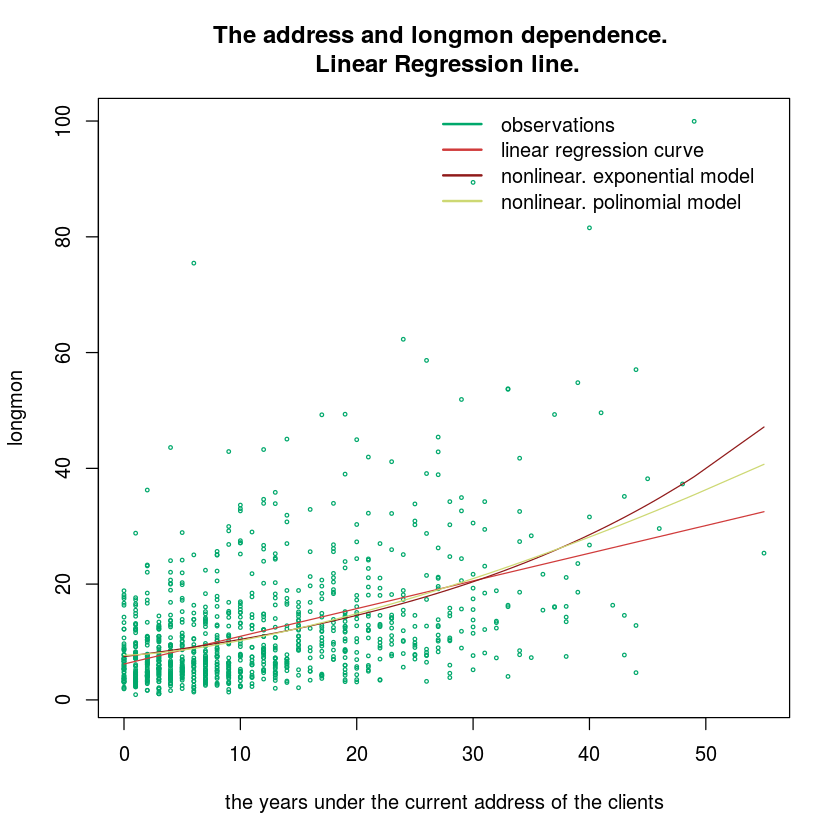

In [17]:
plot(x=df$address, y = df$longmon , col = "#00A86B" , 
     cex=.4 ,xlab="the years under the current address of the clients", ylab="longmon" )
lines(df$address, fitted(lm(longmon~address, data=df)), col="#d03b3b") # regression line (y~x)
lines(df$address[order(df$address)], predict(nls(longmon ~ a1*exp(b1*address), data=df[order(df$address),], start=list(a1=100,b1=.05))), col="#901a1a") # regression line (y~x) 
lines(df$address[order(df$address)], predict(nls(longmon ~ a+b*address^c, data=df[order(df$address),], start=list(a=0,b=1,c=2))), col="#cdd873") # regression line (y~x) 

title("\nThe address and longmon dependence. \n Linear Regression line.\n")


legend(x = "topright", 
 c("observations", "linear regression curve ", "nonlinear. exponential model", "nonlinear. polinomial model"),
 col = c("#00A86B", "#d03b3b", "#901a1a","#cdd873"),
 lwd = c(2, 2, 2),bty='n', xpd=NA)

##### <span style="color:#d03b3b">(c) Explain in your own words, why all the classical tests and inferences are not directly applicable to the NLS estimators.</span>

The computation of many of such tests (and inferences) depends on COVARIANCE MATRIX. But for nonlinear model covariance matrix doesn't include only constants because of gradients this result which required for hypothesis testing or confidence intervals, are more difficult and computationally expensive. The same formulas as for linear models can be applied, but the result then is only approximations and in some cases these approximations can be informationally poor. Additional computations for more precise analysis of approximations can be done, but it is hard to compute them.

A second problem that is often associated with nonlinear regression analysis is the numerical computation of MAXIMUM LIKELIHOOD ESTIMATES. Usually the computation of MLE is based on an iterative process that requires carefully chosen initial starting points to avoid convergence to local optima. Depending upon the nonlinear function this can be a challenging problem.

So, exact confidence interval procedures or exact hypothesis tests are generally not available for parameters in nonlinear regression models. However, APPROXIMATE INFERENCE PROCEDURES are available. A key step in the statistical inference on unknown parameters of a model is to compute the standard errors of various estimates. If the statistical model is either nonlinear or the parameter of interest in a linear model is a nonlinear function of the regression parameters, then the approximate standard errors are usually derived by using the first order term in a suitable Taylor's series expansion.

Hence all classical tests and inferences apply in NLS estimators only asymptotically.

#####  <span style="color:#901a1a">3. Next we model the relationship between $longmon$ and $address$ using the nonparametric Nadaraya-Watson regression.</span>
    
##### <span style="color:#d03b3b">(a) An important calibration parameter of a nonparametric regression is the bandwidth. Explain what happens with the regression/the weights in the Nadaraya-Watson regression if the bandwidth is too high or too small.</span>

The resulting estimator is a smooth and continuous function.The bandwidth parameter $h$ determines degree of smoothnes of the estimated regression function. And it's important to chose compromise between over- and undersmoothing.

If $h ~ 0$, than each entry of the dataset will be assigned a weight equal to the number of observations. This will cause the regression curve to converge to the original data representation.

If $h ~ \infty$, each entry of the dataset will be assigned a weight equal to $1$. This will cause the regression curve to be a horizontal line equal to the mean of values.

So, in general it is kind of regularization parameter of the nonparametric model. Decreasing bandwidth implies smaller bias, but larger variance. 


##### <span style="color:#d03b3b">(b) Fit a Nadaraya-Watson regression with Gaussian kernel and “optimal” bandwidth to the longmon/address data. Check and explain how the “optimal bandwidth” is determined in your software. Plot the data and the regression curve.</span>

bwmethod

    which method to use to select bandwidths. cv.aic specifies expected Kullback-Leibler cross-validation (Hurvich, Simonoff, and Tsai (1998)), and cv.ls specifies least-squares cross-validation. Defaults to cv.ls.
    
ckertype

    character string used to specify the continuous kernel type. Can be set as gaussian, epanechnikov, or uniform. Defaults to gaussian.

In [18]:
library("np")

"NADARAYA-WARSON REGRESSION"
bw <- npregbw(formula=longmon ~ address, data=df[order(df$address),], regtype="lc", bwmethod="cv.ls", ckertype="gaussian")
model<- npreg(bws=bw);
#npplot(bw, type="l");
summary(model)

Nonparametric Kernel Methods for Mixed Datatypes (version 0.60-9)
[vignette("np_faq",package="np") provides answers to frequently asked questions]
[vignette("np",package="np") an overview]
[vignette("entropy_np",package="np") an overview of entropy-based methods]


[1] "NADARAYA-WARSON REGRESSION"

                   
Regression Data: 1000 training points, in 1 variable(s)
               address
Bandwidth(s): 5.535242

Kernel Regression Estimator: Local-Constant
Bandwidth Type: Fixed
Residual standard error: 9.153412
R-squared: 0.2261626

Continuous Kernel Type: Second-Order Gaussian
No. Continuous Explanatory Vars.: 1



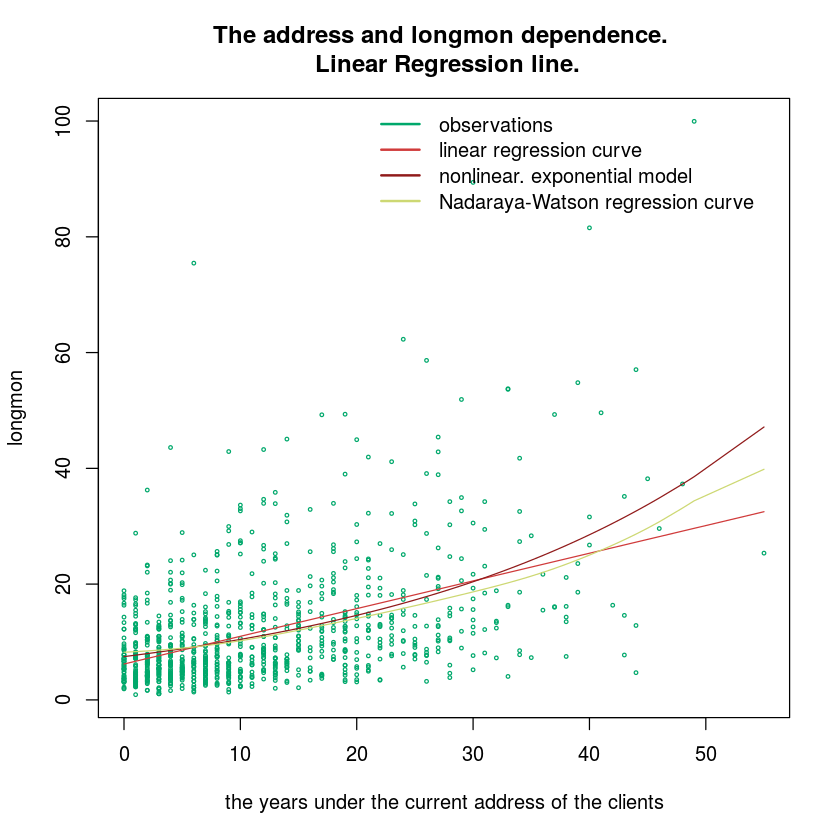

In [19]:
plot(x=df$address, y = df$longmon , col = "#00A86B" , 
     cex=.4 ,xlab="the years under the current address of the clients", ylab="longmon" )
lines(df$address, fitted(lm(longmon~address, data=df)), col="#d03b3b") # regression line (y~x)
lines(df$address[order(df$address)], predict(nls(longmon ~ a1*exp(b1*address), data=df[order(df$address),], start=list(a1=100,b1=.05))), col="#901a1a") # regression line (y~x) 
lines(df$address[order(df$address)], predict(model), col="#cdd873") # regression line (y~x) 

title("\nThe address and longmon dependence. \n Linear Regression line.\n")


legend(x = "topright", 
 c("observations", "linear regression curve ", "nonlinear. exponential model", "Nadaraya-Watson regression curve"),
 col = c("#00A86B", "#d03b3b", "#901a1a","#cdd873"),
 lwd = c(2, 2, 2),bty='n', xpd=NA)

Here I used "npregbw" method (from "np" package in CRAN). 

The "bwmethod" parametr is responsible for which method is used to select bandwidths. "cv.aic" specifies expected Kullback-Leibler cross-validation (Hurvich, Simonoff, and Tsai (1998)), and "cv.ls" specifies least-squares cross-validation. Defaults to "cv.ls".

##### <span style="color:#d03b3b">(c) Compare the (in-sample) fit of the nonparametric regression and the nonlinear regression in the previous subproblem.</span>

In [20]:
"NON-LINEAR REGRESSION. EXPONENTIAL MODEL"
summary(z3)

"NADARAYA-WARSON REGRESSION. Gaussian Kernel"
summary(model)

"NADARAYA-WARSON REGRESSION. Epanechnikov Kernel "
bw_Epon <- npregbw(formula=longmon ~ address, data=df[order(df$address),], regtype="lc", bwmethod="cv.ls", ckertype="epanechnikov")
model_NW_Epon<- npreg(bws=bw_Epon);
#npplot(bw, type="l");
summary(model_NW_Epon)

[1] "NON-LINEAR REGRESSION. EXPONENTIAL MODEL"


Formula: longmon ~ a1 * exp(b1 * address)

Parameters:
   Estimate Std. Error t value Pr(>|t|)    
a1 7.474095   0.315355   23.70   <2e-16 ***
b1 0.033486   0.001686   19.86   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.123 on 998 degrees of freedom

Number of iterations to convergence: 5 
Achieved convergence tolerance: 4.884e-07


[1] "NADARAYA-WARSON REGRESSION. Gaussian Kernel"


Regression Data: 1000 training points, in 1 variable(s)
               address
Bandwidth(s): 5.535242

Kernel Regression Estimator: Local-Constant
Bandwidth Type: Fixed
Residual standard error: 9.153412
R-squared: 0.2261626

Continuous Kernel Type: Second-Order Gaussian
No. Continuous Explanatory Vars.: 1



[1] "NADARAYA-WARSON REGRESSION. Epanechnikov Kernel "

                   
Regression Data: 1000 training points, in 1 variable(s)
               address
Bandwidth(s): 2.236082

Kernel Regression Estimator: Local-Constant
Bandwidth Type: Fixed
Residual standard error: 8.962584
R-squared: 0.2528799

Continuous Kernel Type: Second-Order Epanechnikov
No. Continuous Explanatory Vars.: 1



RSE=9.15 in a Nadaraya-Watson regression with Gaussian kernel is better then in linear regression but worse then in nonlinear. This is so because the data is very vertically spread. But if to use Epanechnikov kernel RSE would be equal to 8.96 which is the smallest result of all my previous models in this task

#####  <span style="color:#901a1a">4. Next we consider classification of the clients using the churn variable as the dependent variable and the logistic regression.</span>

##### <span style="color:#d03b3b">(a) Fit a logistic regression to explain churn by the remaining explanatory variables.</span>

In [21]:
df

tenure,age,address,income,employ,longmon,wiremon,marital_Yes,retire_Yes,gender_Female,churn_Yes,ed_HS,ed_SC,ed_CD,ed_PD
13,44,9,64,5,3.70,0.00,1,0,0,1,0,0,1,0
11,33,7,136,5,4.40,35.70,1,0,0,1,0,0,0,1
68,52,24,116,29,18.15,0.00,1,0,1,0,0,0,0,0
33,33,12,33,0,9.45,0.00,0,0,1,1,1,0,0,0
23,30,9,30,2,6.30,0.00,1,0,0,0,0,0,0,0
41,39,17,78,16,11.80,0.00,0,0,1,0,1,0,0,0
45,22,2,19,4,10.90,0.00,1,0,1,1,1,0,0,0
38,35,5,76,10,6.05,64.90,0,0,0,0,1,0,0,0
45,59,7,166,31,9.75,0.00,1,0,0,0,0,0,1,0
68,41,21,72,22,24.15,0.00,1,0,0,0,0,0,0,0


In [22]:
logistic_model<-glm(churn_Yes~tenure+age+marital_Yes+address+income+employ+longmon+retire_Yes+gender_Female+wiremon+ed_HS+ed_SC+ed_CD+ed_PD,data=df, family=binomial(logit))

summary(logistic_model)


Call:
glm(formula = churn_Yes ~ tenure + age + marital_Yes + address + 
    income + employ + longmon + retire_Yes + gender_Female + 
    wiremon + ed_HS + ed_SC + ed_CD + ed_PD, family = binomial(logit), 
    data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6891  -0.7859  -0.4399   0.9089   2.6960  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)    0.0665655  0.4137112   0.161  0.87217    
tenure        -0.0316908  0.0070667  -4.485 7.31e-06 ***
age            0.0007173  0.0108795   0.066  0.94743    
marital_Yes    0.0441584  0.1634581   0.270  0.78704    
address       -0.0146731  0.0128014  -1.146  0.25171    
income         0.0005143  0.0010434   0.493  0.62206    
employ        -0.0322478  0.0151843  -2.124  0.03369 *  
longmon       -0.0384885  0.0217376  -1.771  0.07663 .  
retire_Yes    -0.6151134  0.6906561  -0.891  0.37313    
gender_Female  0.0705760  0.1597342   0.442  0.65861    
wiremon        0.01412

$pseudo R^2= \frac{Residual deviance}{Null deviance}=\frac{958.72}{1174.39}=0.816$

##### <span style="color:#d03b3b">(b) Consider the explanatory variable $tenure$. Obviously its parameter cannot be intepreted in the same way as for a linear regression. Provide the correct intepretation using odds.</span>

In logistic regression models it is harder to interpret the paramaters then in linear regression. But with this purpose the $odds$ of the logistic regression can be used.

<span style="color:#00A86B">$Odds = \frac{P(Y=1|X)}{P(Y=0|X)}=e^z=e^{\beta_0+x_1\beta_1+....+x_n\beta_n}$</span>

So, as the parametr of $tenure$ equals to $\beta_{tenure}=-0.0316908$. This implies that if the value of the tenure changes by 1 (increases) => $z$ falls by $\beta_{tenure}$ => $odds$ falls by e^{\beta_tenure} => the probability that the contract was terminated falls.

##### <span style="color:#d03b3b">(c) Run a stepwise model selection using AIC as criterion. Further consider only the optimal model chosen here. From the final model, which of the variables do increase the probability of churn and which variables decrease this probability? Is this consistent with economic intuition?</span>

To choose the smallest model without insignificant regressors with still good explanatory power I will use Akaike's An Information Criterion (AIC) method in this analysis.

In [23]:
fit <- glm(churn_Yes~.,data=df, family=binomial(logit))
AIC(fit) # 988.718
fit.transformed <- glm(churn_Yes~. -age ,data=df, family=binomial(logit))
AIC(fit.transformed) # 986.722
fit.transformed <- glm(churn_Yes~. -age -marital_Yes,data=df, family=binomial(logit))
AIC(fit.transformed) # 984.796
fit.transformed <- glm(churn_Yes~. -age -marital_Yes -gender_Female,data=df, family=binomial(logit))
AIC(fit.transformed) # 983.002
fit.transformed <- glm(churn_Yes~. -age -marital_Yes -gender_Female -income,data=df, family=binomial(logit))
AIC(fit.transformed) # 981.234
fit.transformed <- glm(churn_Yes~. -age -marital_Yes -gender_Female -income -retire_Yes,data=df, family=binomial(logit))
AIC(fit.transformed) # 980.397
fit.transformed <- glm(churn_Yes~. -age -marital_Yes -gender_Female -income -retire_Yes -address,data=df, family=binomial(logit))
AIC(fit.transformed) # 980.361
fit.transformed <- glm(churn_Yes~. -age -marital_Yes -gender_Female -income -retire_Yes -address -longmon,data=df, family=binomial(logit))
AIC(fit.transformed) # 982.356
fit.transformed <- glm(churn_Yes~. -age -marital_Yes -gender_Female -income -retire_Yes -address,data=df, family=binomial(logit))
AIC(fit.transformed) # 980.361
#summary(fit.transformed )

[1] 988.7175

[1] 986.7218

[1] 984.7957

[1] 983.0024

[1] 981.2337

[1] 980.3967

[1] 980.3615

[1] 982.3557

[1] 980.3615

As result of our AIC tests I removed age, marital_Yes, gender_Female, income, retire_Yes and address parameters from the model, minimizing AIC critea. To understand how AIC criteria works I can describe the last step, that I did:

1) Calculate AIC criteria after previous step(removing retire_Yes regressor)

2) Check p-values of significance our regressors in the model

3) Select the least significant regressor (with the biggest p-value) and try to remove it from our model. Our least significant column is address.

4) Calculate AIC criteria again to check did the value change. Our AIC is less, than previous so I delete our address  column from model and it was a good choice.

5) I tried to find more insignificant columns, so I tred to do the same with longmon regressor, but receive AIC bigger, than previous, so I stopped removing regressors process.

Also I don't delete any of the education parameters as it's complex set of values and can be deleted only if all education values are insignificant. But it is not so.

So, as a result of AIC creterion transformation I received the model:

In [24]:
summary(fit.transformed)


Call:
glm(formula = churn_Yes ~ . - age - marital_Yes - gender_Female - 
    income - retire_Yes - address, family = binomial(logit), 
    data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6787  -0.7908  -0.4475   0.9032   2.7564  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.081356   0.245306   0.332 0.740153    
tenure      -0.032911   0.006872  -4.789 1.68e-06 ***
employ      -0.033839   0.011261  -3.005 0.002657 ** 
longmon     -0.040756   0.021509  -1.895 0.058112 .  
wiremon      0.014488   0.004257   3.404 0.000665 ***
ed_HS        0.252378   0.261167   0.966 0.333870    
ed_SC        0.450814   0.269805   1.671 0.094744 .  
ed_CD        0.822526   0.265726   3.095 0.001966 ** 
ed_PD        0.966579   0.359881   2.686 0.007235 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1174.39  on 999  degrees of freedom

$pseudo R^2= \frac{Residual deviance}{Null deviance}=\frac{962.36}{1174.39}=0.819$

Here the $wiremon$ (internet use last month) parameter and the parameters corresponding to the presence of any $education$ category increase the probability of churn. But the parameters tenure, employ and longmon decreases such probability.

This is consistent and reasonable with economic perspective, as it is obvious that those who are employed, who have been clients of the company for a long time (tenure) and who tend to call long distance calls (longmon) are LESS inclined to terminate the contract. Expecially considering that longmon feature implies that client makes calls, thus obviously the contract was not terminated. 

And maybe it's reasonable that those, who use internet more then others (high wiremon), are MORE inclined to terminate the contract.

##### <span style="color:#d03b3b">(d) Randomly pick up five clients. Determine their probabilities of leaving the company. Provide for the first of them the formula which may be used to compute this probability with inserted values of parameters and variables. If you want to predict the membership in one of the two groups for a particular client, what is the simplest way to proceed using these probabilities?</span>

In [25]:
set.seed(11)
number_of_clients<-sample(1:1000, 5)
for (i in number_of_clients){
    print("________________________________________________________________")
    print('Probabilities of leaving the company client:')
    print(predict(fit.transformed, newdata=df[i,], type="response"))
    print("Actual churn value")
    print(ifelse (df[i,]["churn_Yes"]>0 , "The contract was terminated last month","No"))
    print("________________________________________________________________")
    
}

[1] "________________________________________________________________"
[1] "Probabilities of leaving the company client:"
       278 
0.03688503 
[1] "Actual churn value"
    churn_Yes
278 "No"     
[1] "________________________________________________________________"
[1] "________________________________________________________________"
[1] "Probabilities of leaving the company client:"
        1 
0.5389318 
[1] "Actual churn value"
  churn_Yes                               
1 "The contract was terminated last month"
[1] "________________________________________________________________"
[1] "________________________________________________________________"
[1] "Probabilities of leaving the company client:"
      510 
0.1838009 
[1] "Actual churn value"
    churn_Yes
510 "No"     
[1] "________________________________________________________________"
[1] "________________________________________________________________"
[1] "Probabilities of leaving the company client:"
       15 
0.3

Formula that may be used to predict probability of leaving the company:
<span style="color:#00A86B">$z=\beta_0+\beta_{tenure}*x_{tenure}+\beta_{employ}*x_{employ}+
    \beta_{longmon}*x_{longmon}+\beta_{wiremon}*x_{wiremon}+
    \beta_{ed\_HS}* x_{ed\_HS}+\beta_{ed\_SC}*x_{ed\_SC}+
    \beta_{ed\_CD}*x_{ed\_CD}+\beta_{ed\_PD}*x_{ed\_PD}$
$P(x_{churn}=1)=\frac{1}{1+\exp^{-z}}$</span>

In [26]:
"FIRST RANDOM CLIENT"
print(df[278,])
coef(fit.transformed)

[1] "FIRST RANDOM CLIENT"

    tenure age address income employ longmon wiremon marital_Yes retire_Yes
278     61  46       5    318     18    28.9       0           0          0
    gender_Female churn_Yes ed_HS ed_SC ed_CD ed_PD
278             1         0     0     1     0     0


(Intercept)      tenure      employ     longmon     wiremon       ed_HS 
 0.08135600 -0.03291149 -0.03383873 -0.04075565  0.01448822  0.25237829 
      ed_SC       ed_CD       ed_PD 
 0.45081363  0.82252602  0.96657912

Formula that may be used to predict probability of leaving the company of client 278:
<span style="color:#00A86B">$z=0.081 - 0.0329*61 - 0.0338*18 +
    -0.0408*28.9 + 0.4508*1$</span>
    
<span style="color:#00A86B">$P(x_{churn}=1)=\frac{1}{1+z}$</span>

In [27]:
logit_zi <- function(entry) {new<-coef(fit.transformed)['(Intercept)']+
    coef(fit.transformed)['tenure']*entry['tenure']+coef(fit.transformed)['employ']*entry['employ']+
    coef(fit.transformed)['longmon']*entry['longmon']+coef(fit.transformed)['wiremon']*entry['wiremon']+
    coef(fit.transformed)['ed_HS']*entry['ed_HS']+coef(fit.transformed)['ed_SC']*entry['ed_SC']+
    coef(fit.transformed)['ed_CD']*entry['ed_CD']+coef(fit.transformed)['ed_PD']*entry['ed_PD'] 
                             new[1,1]
}

probability_of_i<-function(entry) {
    1/(1+exp(-logit_zi(entry)))
}

"PROBABILITY OF CHURN VALUE OF THE 278 CLIENT BY THE FORMULA"
print(probability_of_i(df[278,]))
"PROBABILITY OF CHURN VALUE OF THE 278 CLIENT PREDICTED BY THE MODEL"
print(predict(fit.transformed, newdata=df[278,], type="response"))

[1] "PROBABILITY OF CHURN VALUE OF THE 278 CLIENT BY THE FORMULA"

[1] 0.03688503


[1] "PROBABILITY OF CHURN VALUE OF THE 278 CLIENT PREDICTED BY THE MODEL"

       278 
0.03688503 


If you want to predict the MEMBERSHIP in one of the two groups for a particular $client$, the simplest way to proceed using these probabilities is to use some value $threshholdЄ[0,1]$ (usually 0.5) and, if the model predicts $client$'s probability $greater$ then $treshold$, assign the client to the $first$ $group$ and, if the probability $less$ then $threshold$, to the $second$ $group$.

    
##### <span style="color:#d03b3b">(e) Compute the classification table and calculate the specifity and sensitivity. Provide verbal interpretation for the elements of the classification table and the performance measures.</span>

In [28]:
"IF THRESHOLD = 0.5"
"CLASSIFICATION TABLE"
classDF <- data.frame(truth = df$churn, predicted = round(predict(fit.transformed, type="response"),0))

xtabs(~ truth+predicted, data = classDF)
"CORRECTLY PREDICTED"
print((668+105)/1000)
"MISTAKES"
print((169+58)/1000)

[1] "IF THRESHOLD = 0.5"

[1] "CLASSIFICATION TABLE"

     predicted
truth   0   1
    0 668  58
    1 169 105

[1] "CORRECTLY PREDICTED"

[1] 0.773


[1] "MISTAKES"

[1] 0.227


668 clients hadn't terminated the contracts and where predicted not to terminate.

105 clients left the company and where predicted so.

169 clients left the company but the model estimated them not to
 
 58 clients hadn't terminated the contracts but the model predicted that they whould terminate
 
 77.3% are correctly predicted

In [29]:
n11<-105
n00<-668
n10<-58
n01<-169

"SENSITIVITY"
sensitivity<-n11/(n11+n01)
sensitivity
"Only 38.32% of those who terminated the contract where predicted to do so"
"________________________________________________________________________________________________"
"SPECIFICITY"
specificity<-n00/(n00+n10)
specificity
"92.01% of clients who hadn't terminated the contract where correctly predicted not to terminate"
"________________________________________________________________________________________________"
"PPV"
PPV<-n11/(n11+n10)
PPV
"64.42% of all clients classified as those who would terminate , really terminated the contract"
"________________________________________________________________________________________________"
"NPV"
NPV<-n00/(n01+n00)
NPV
"79.81% of all clients classified as those who wouldn't terminate , really hadn't terminated the contract"
"________________________________________________________________________________________________"



[1] "SENSITIVITY"

[1] 0.3832117

[1] "Only 38.32% of those who terminated the contract where predicted to do so"

[1] "________________________________________________________________________________________________"

[1] "SPECIFICITY"

[1] 0.9201102

[1] "92.01% of clients who hadn't terminated the contract where correctly predicted not to terminate"

[1] "________________________________________________________________________________________________"

[1] "PPV"

[1] 0.6441718

[1] "64.42% of all clients classified as those who would terminate , really terminated the contract"

[1] "________________________________________________________________________________________________"

[1] "NPV"

[1] 0.7980884

[1] "79.81% of all clients classified as those who wouldn't terminate , really hadn't terminated the contract"

[1] "________________________________________________________________________________________________"

##### <span style="color:#d03b3b">(f) To improve the performance it makes sense to change the threshold used for classification. This can be done using the ROC curve. Plot this curve and determine the optimal threshold.</span>

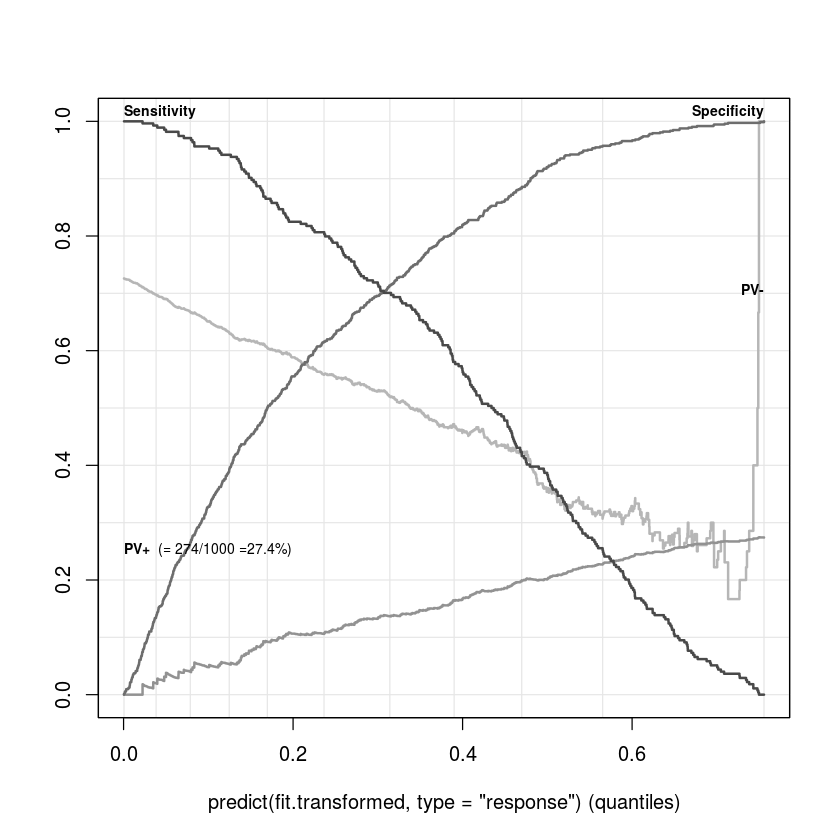

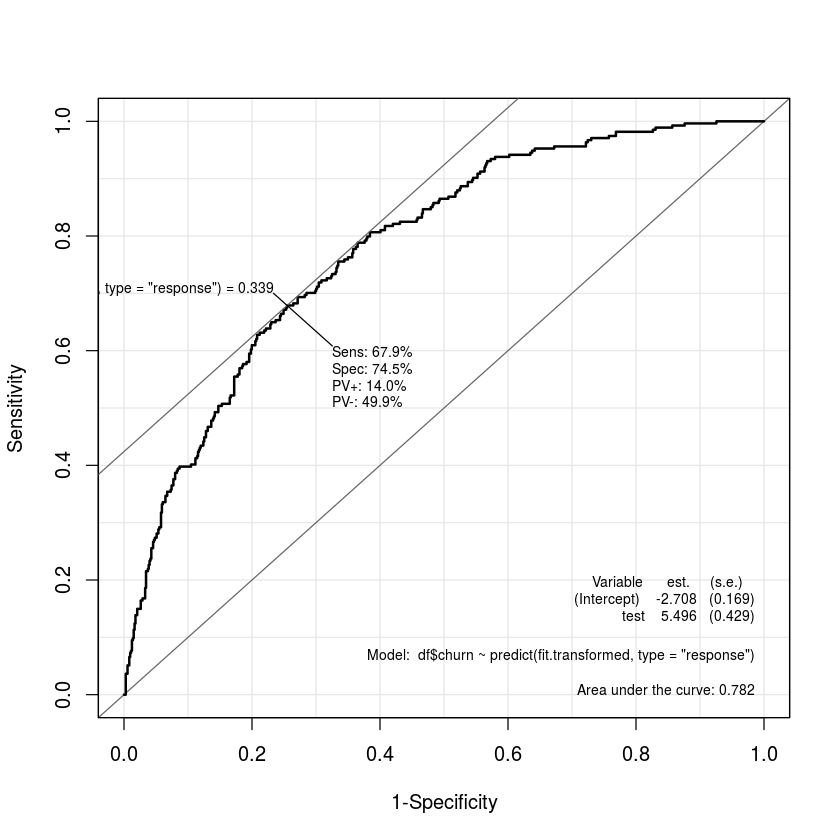

In [30]:
library(Epi)
ROC( predict(fit.transformed, type="response"), df$churn)

The second plot represents the ROC curve, which is sensitivity values as a function of specificity. The curve loooks pretty steep, which means that the algorithm is pretty good. ROC-value = 0.782.

Optimal threshold = 0.339. With this threshhold the model willl be closer to the oracle point.

##### <span style="color:#d03b3b">(g) Recompute the classification table, sensitivity and specifity for the new threshold. Provide interpretation of the obtained values. Compare the results with the original values. Is the procedure now more strict/conservative?</span>

In [31]:
"IF THRESHOLD = 0.339"
"CLASSIFICATION TABLE"
classDF <- data.frame(truth = df$churn, predicted = ifelse (predict(fit.transformed, type="response")>0.339 ,1,0))
#classDF
xtabs(~ truth+predicted, data = classDF)
"CORRECTLY PREDICTED"
print((541+186)/1000)
"MISTAKES"
print((88+185)/1000)

[1] "IF THRESHOLD = 0.339"

[1] "CLASSIFICATION TABLE"

     predicted
truth   0   1
    0 541 185
    1  88 186

[1] "CORRECTLY PREDICTED"

[1] 0.727


[1] "MISTAKES"

[1] 0.273


541 clients hadn't terminated the contracts and where predicted not to terminate, which is by 127 less than previously (was 668)

186 clients left the company and where predicted so, which is by 81 more than previously (was 105)

88 clients left the company but the model estimated them not to. This is by 81 less than previously (was 169)

185 clients hadn't terminated the contracts but the model predicted that they whould terminate. This is by 127 more than previously (was 58)

72.7% are correctly predicted


In [32]:
n11_opt<-186
n00_opt<-541
n10_opt<-185
n01_opt<-88

"OPT SENSITIVITY"
sensitivity_opt<-n11_opt/(n11_opt+n01_opt)
sensitivity_opt
"Now 67.88% of those who terminated the contract where predicted to do so, which is much greater than was before (was 38.32% )"
"________________________________________________________________________________________________"
"OPT SPECIFICITY"
specificity_opt<-n00_opt/(n00_opt+n10_opt)
specificity_opt
"But the price for better sensitivity is only 74.52% of clients who hadn't terminated " 
"the contract where correctly predicted not to terminate (was  92.01% )"
"________________________________________________________________________________________________"
"OPT PPV"
PPV_opt<-n11_opt/(n11_opt+n10_opt)
PPV_opt
"50.13% of all clients classified as those who would terminate , really terminated the contract, which is worse then was before (was 64.42%)"
"________________________________________________________________________________________________"
"OPT NPV"
NPV_opt<-n00_opt/(n01_opt+n00_opt)
NPV_opt
"86.01% of all clients classified as those who wouldn't terminate , really hadn't terminated the contract, which is better than before (was 79.81% )"
"________________________________________________________________________________________________"

[1] "OPT SENSITIVITY"

[1] 0.6788321

[1] "Now 67.88% of those who terminated the contract where predicted to do so, which is much greater than was before (was 38.32% )"

[1] "________________________________________________________________________________________________"

[1] "OPT SPECIFICITY"

[1] 0.7451791

[1] "But the price for better sensitivity is only 74.52% of clients who hadn't terminated "

[1] "the contract where correctly predicted not to terminate (was  92.01% )"

[1] "________________________________________________________________________________________________"

[1] "OPT PPV"

[1] 0.5013477

[1] "50.13% of all clients classified as those who would terminate , really terminated the contract, which is worse then was before (was 64.42%)"

[1] "________________________________________________________________________________________________"

[1] "OPT NPV"

[1] 0.8600954

[1] "86.01% of all clients classified as those who wouldn't terminate , really hadn't terminated the contract, which is better than before (was 79.81% )"

[1] "________________________________________________________________________________________________"

In general, the procedure now is more STRICT, because we suspect more clients of being able to terminate the contract and leave the company and we are confident in smaller number of clients.


#####  <span style="color:#901a1a">5. In the next step we model $longmon$ using regression trees.</span>
    
##### <span style="color:#d03b3b">(a) Assume the first variable to be used for splitting is $tenure$. Write down the corresponding optimization problem and explain how the optimization works.</span>

If we want to find firstly possible splittings by variable tenure we must implement the next <span style="color:#cdd873">optimization problem</span>:

Find the splitting (tenure) points $s_i$, that separates the space into P+1 regions:

<span style="color:#00A86B">$R_1(tenure, s_i) = \{X|X_{tenure} ≤ s_1\}$ and $R_2 (tenure, s_i) = \{X|s_1<X_{tenure}≤ s_2\}$  .....  $R_{P+1}(tenure, s_i) = \{X|s_{P+1} > X_{tenure}\}$</span>

<span style="color:#cdd873">$\{s_i\}_{iЄ1..P}$</span> are determined using the following objective function:

<span style="color:#00A86B">$\sum_{p=1}^{P+1}{\sum_{iЄR_p(tenure, s)}{(y_i-ŷ_{R_p})}^2}$</span>

where $ŷ_{R_p}$  are averages in regions $R_p$


In [33]:
#plot(x=df$tenure, y = df$longmon , col = "#859a01" , cex=.4, xlab="tenure", ylab="longmon")


##### EXPLAINING OF THE OPTIMISATION with one variable
<img src="tenuretree.png" alt="Drawing" style="width: 1000px;"/>

##### <span style="color:#d03b3b">(b) Obviously you can get very long trees. Tree prunning helps to get trees of a reasonable size. Fit a CART to the data and prune it to have at most 10 splits. What is the value of the corresponding complexity parameter? Check you software for the implementation of the prunning, particularly the form of the loss function.</span>

Firstly, I fit the CART to the data with complexity parameter= 0.001

Rattle: A free graphical interface for data science with R.
Version 5.2.0 Copyright (c) 2006-2018 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.



Regression tree:
rpart(formula = longmon ~ ., data = df, control = rpart.control(cp = 0.001, 
    xval = 10))

Variables actually used in tree construction:
[1] address       age           ed_CD         employ        gender_Female
[6] income        tenure        wiremon      

Root node error: 107294/1000 = 107.29

n= 1000 

          CP nsplit rel error  xerror     xstd
1  0.4645252      0   1.00000 1.00361 0.126947
2  0.1305525      1   0.53547 0.55646 0.068386
3  0.0718353      2   0.40492 0.43585 0.066285
4  0.0229809      3   0.33309 0.35677 0.043642
5  0.0221752      4   0.31011 0.36825 0.046308
6  0.0117105      5   0.28793 0.35649 0.048091
7  0.0049763      6   0.27622 0.33561 0.043201
8  0.0038331      7   0.27124 0.33848 0.041513
9  0.0027134      8   0.26741 0.35220 0.041396
10 0.0023957      9   0.26470 0.35537 0.041620
11 0.0022011     10   0.26230 0.35881 0.041742
12 0.0021049     11   0.26010 0.35837 0.041750
13 0.0020677     12   0.25800 0.35915 0.041796
14 0.0018199  

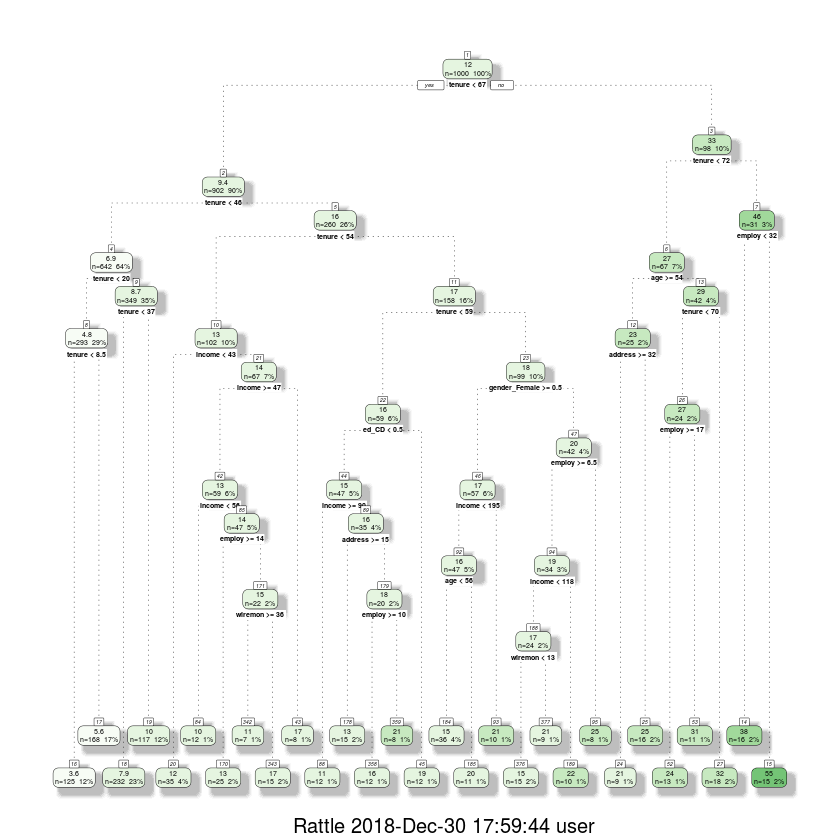

In [34]:
library(rpart)
library(rattle)
rpart.df<-rpart(formula = longmon ~ ., data = df, control = rpart.control(cp = 0.001, xval = 10))
printcp(rpart.df)
fancyRpartPlot(rpart.df)

I can see that here is 29 nsplits. So I can do pruning to make smaller number of splitting. For this I will use <span style="color:#00A86B">$prune.rpart$</span>, which determines a nested sequence of subtrees of the supplied rpart object by recursively snipping off the least important splits, based on the complexity parameter (cp).

Here arguments are:

$tree$

    fitted model object of class "rpart". 
$cp$

    Complexity parameter to which the rpart object will be trimmed.
    
So to prune the optimal tree I must increase $complexity$ $parameter$ alpha, so that the number of terminal nodes whould be decresed till 10.

<img src="function.png" alt="Drawing" style="width: 800px;"/>

I know, that $complexity$ $parameter$ is a restriction that any split that does not decrease the overall lack of fit by a factor of cp is not attempted. Tthis means that the overall R-squared must increase by cp at each step. 

.......
<img src="pruning.png" alt="Drawing" style="width: 1000px;"/>
.....


From the printed information about  <span style="color:#00A86B">rpart.df regression tree</span> I can see that when I have 10 splits the $rel\_error_{10}=0.26470$, but for 11 splits $rel\_error_{11}=0.26230$. So the 11'th split decrease the overall lack of fit by 0.26470-0.26230=0.0024. And any next split will decrease the overall lack of fit by smaller value. So, to prune my try to 10 splits I can use $prune.rpart$ with $cp=0.0024$


Regression tree:
rpart(formula = longmon ~ ., data = df, control = rpart.control(cp = 0.001, 
    xval = 10))

Variables actually used in tree construction:
[1] age    employ tenure

Root node error: 107294/1000 = 107.29

n= 1000 

          CP nsplit rel error  xerror     xstd
1  0.4645252      0   1.00000 1.00361 0.126947
2  0.1305525      1   0.53547 0.55646 0.068386
3  0.0718353      2   0.40492 0.43585 0.066285
4  0.0229809      3   0.33309 0.35677 0.043642
5  0.0221752      4   0.31011 0.36825 0.046308
6  0.0117105      5   0.28793 0.35649 0.048091
7  0.0049763      6   0.27622 0.33561 0.043201
8  0.0038331      7   0.27124 0.33848 0.041513
9  0.0027134      8   0.26741 0.35220 0.041396
10 0.0024100      9   0.26470 0.35537 0.041620


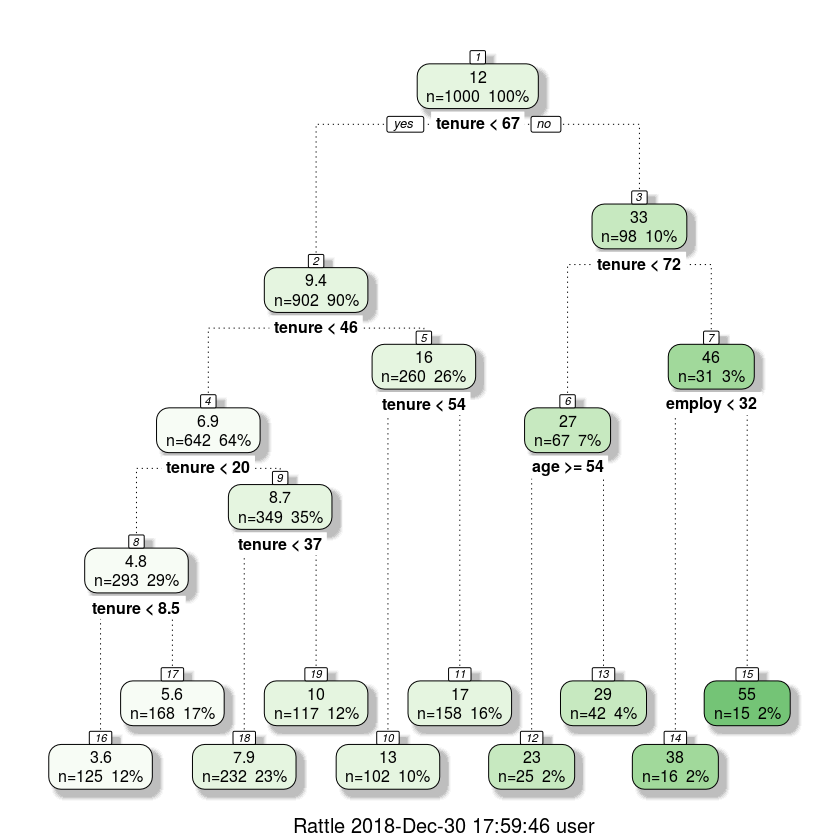

In [35]:
cp.10 = 0.00241
rpart.df.prune=prune(rpart.df, cp=cp.10)
printcp(rpart.df.prune)
fancyRpartPlot(rpart.df.prune)

Now,my tree has exactly 10 splits

Also, a good practice to prune a tree may be to find a number of splits where xerror has its minimal value

[1] "CORRESPONDING COMPLEXITY PARAMETER:"

[1] 0.004976253


Regression tree:
rpart(formula = longmon ~ ., data = df, control = rpart.control(cp = 0.001, 
    xval = 10))

Variables actually used in tree construction:
[1] employ tenure

Root node error: 107294/1000 = 107.29

n= 1000 

         CP nsplit rel error  xerror     xstd
1 0.4645252      0   1.00000 1.00361 0.126947
2 0.1305525      1   0.53547 0.55646 0.068386
3 0.0718353      2   0.40492 0.43585 0.066285
4 0.0229809      3   0.33309 0.35677 0.043642
5 0.0221752      4   0.31011 0.36825 0.046308
6 0.0117105      5   0.28793 0.35649 0.048091
7 0.0049763      6   0.27622 0.33561 0.043201


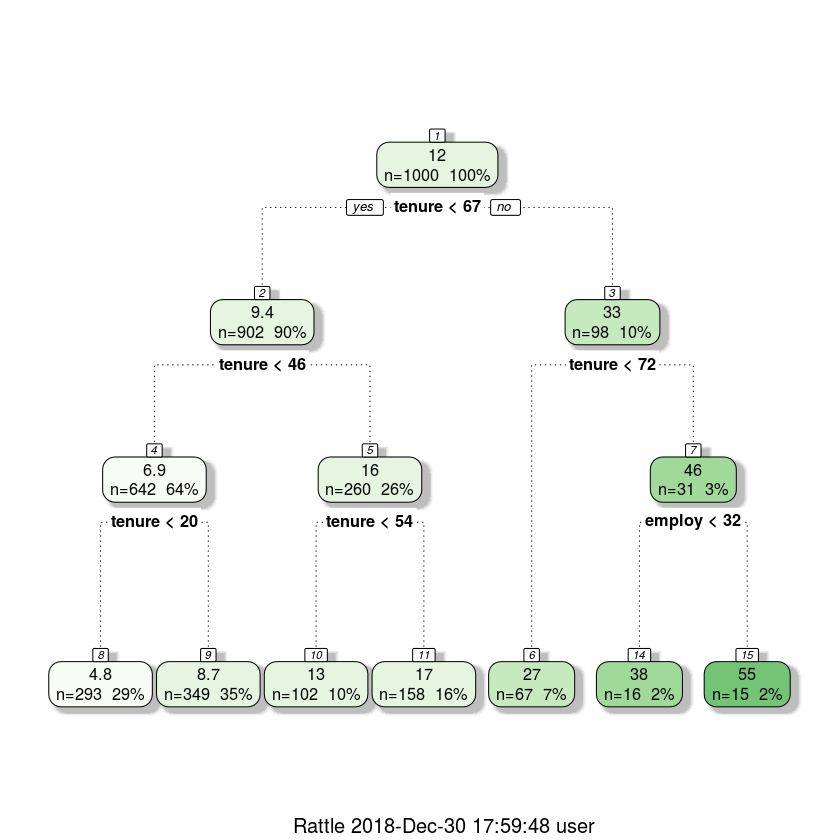

In [36]:
cp.min = which.min(rpart.df$cptable[,4]);
"CORRESPONDING COMPLEXITY PARAMETER:" 
rpart.df$cptable[cp.min,1]
rpart.df.prune=prune(rpart.df, cp=rpart.df$cptable[cp.min,1])
printcp(rpart.df.prune)
fancyRpartPlot(rpart.df.prune)

By this method I got the prunned tree with 6 splits which is less then 10.

##### <span style="color:#d03b3b">(c) (*) Which properties of the trees guarantees that prunning using a single complexity parameter works? Give short verbal summary of these properties.</span>

These properties are:

<span style="color:#00A86B">1)For given $α$ it is possible to determine the tree $T(α)$ with the smallest $R_α(T)$ uniquely.</span>

<span style="color:#00A86B">2)If $α > β$ then $T(α) = T(β)$ or $T(α)$ is a strict subtree of $T(β)$.</span>

So, to prune the tree using a single complexity parameter  $α$  I can increase  $complexity$ $parameter$: $(β-> α; α>β)$. This will imply (from <span style="color:#00A86B">property 2</span>) that new prunned tree $T(α)$ will be a strict subtree of $T(β)$ with the same nodes or a smaller amount (some subsample of previous nodes). Also, (from <span style="color:#00A86B">property 1</span>) I can make a conclusion that I will always be able to determine such a subtree $T(α)$ with the smallest $R_α(T)$ uniquely.

Where  <img src="function.png" alt="Drawing" style="width: 600px;"/>